In [32]:
import openweathermapy.core as owm
from citipy import citipy

In [33]:
%matplotlib notebook
%matplotlib inline

In [34]:
# Dependencies and Setup
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_file = "data/city_data.csv"
ride_file = "data/ride_data.csv"

In [35]:
# Read the City and Data
cities_df = pd.read_csv(city_file)
cities_df = cities_df.sort_values(['city'])
cities_df = cities_df.reset_index(drop=True)
cities_df.head()

,city,driver_count,type
0,Amandaburgh,12,Urban
1,Barajasview,26,Urban
2,Barronchester,11,Suburban
3,Bethanyland,22,Suburban
4,Bradshawfurt,7,Rural


In [36]:
# Read the Ride and Data
rides_df = pd.read_csv(ride_file)
rides_df = rides_df.sort_values(['city'])
rides_df = rides_df.reset_index(drop=True)
rides_df.head()

,city,date,fare,ride_id
0,Amandaburgh,2018-04-24 08:02:27,14.55,7836117055007
1,Amandaburgh,2018-02-10 20:42:46,36.17,6455620849753
2,Amandaburgh,2018-02-24 23:10:49,43.66,6573820412437
3,Amandaburgh,2018-03-05 02:15:38,26.28,906850928986
4,Amandaburgh,2018-03-07 02:26:33,18.76,3419454549176


In [37]:
# Verify the cities in the rides_df and cities_df are consistant
# Every city has ride/rides, so can use inner join
cities_from_cities = sorted(cities_df.loc[:, "city"])
cities_from_rides = sorted(rides_df["city"].unique())
cities_from_cities == cities_from_rides

True

In [38]:
# Combine the data into a single dataset
cities_rides_df = pd.merge(rides_df, cities_df, on="city")
cities_rides_df.head()

,city,date,fare,ride_id,driver_count,type
0,Amandaburgh,2018-04-24 08:02:27,14.55,7836117055007,12,Urban
1,Amandaburgh,2018-02-10 20:42:46,36.17,6455620849753,12,Urban
2,Amandaburgh,2018-02-24 23:10:49,43.66,6573820412437,12,Urban
3,Amandaburgh,2018-03-05 02:15:38,26.28,906850928986,12,Urban
4,Amandaburgh,2018-03-07 02:26:33,18.76,3419454549176,12,Urban


## Bubble Plot of Ride Sharing Data

In [39]:
# get the city types
city_types = sorted(cities_df["type"].unique())
city_types

['Rural', 'Suburban', 'Urban']

In [40]:
# Find x limit

# Group by city type and city
cities_rides_grouped = cities_rides_df.groupby(['type', 'city'])

# Find the ride counts for each city type in each city
number_of_rides = cities_rides_grouped['fare'].count()

# Find the min and max ride count
number_of_rides_min = int(np.floor(number_of_rides.min()))
number_of_rides_max = int(np.ceil(number_of_rides.max()))

x_min = number_of_rides_min - 3
x_max = number_of_rides_max + 2
x_min, x_max

(0, 41)

In [41]:
# Find y limit

# Find the ride counts for each city type in each city
average_fares = cities_rides_grouped['fare'].mean()

# Find the min and max average fares
average_fares_min = int(np.floor(average_fares.min()))
average_fares_max = int(np.ceil(average_fares.max()))

y_min = average_fares_min - 1
y_max = average_fares_max + 1
y_min, y_max

(19, 45)

In [61]:
# Obtain the ride counts and average fair for each city type
rides_summary = {}

for city_type in city_types:
    rides = cities_rides_df.loc[cities_rides_df['type']== city_type]
    rides_grouped = rides.groupby('city')
    number_of_rides_by_city = rides_grouped['fare'].count()
    average_fare_by_city = rides_grouped["fare"].mean()
    drivers_count_by_city = (rides_grouped['driver_count'].mean()) * 10
    rides_summary[city_type] = {"number_of_rides_by_city": number_of_rides_by_city,
                                "average_fare_by_city": average_fare_by_city,
                                "drivers_count_by_city": drivers_count_by_city}

In [62]:
rural_number_of_rides = rides_summary['Rural']['number_of_rides_by_city']
rural_average_fare = rides_summary['Rural']['average_fare_by_city']
rural_drivers_count = rides_summary['Rural']['drivers_count_by_city']

In [63]:
# Obtain the x and y coordinates for Rural
rural_number_of_rides = rides_summary['Rural']['number_of_rides_by_city']
rural_average_fare = rides_summary['Rural']['average_fare_by_city']
rural_drivers_count = rides_summary['Rural']['drivers_count_by_city']

In [89]:
# Obtain the x and y coordinates for Suburban
suburban_number_of_rides = rides_summary['Suburban']['number_of_rides_by_city']
suburban_average_fare = rides_summary['Suburban']['average_fare_by_city']
suburban_drivers_count = rides_summary['Suburban']['drivers_count_by_city']

In [90]:
# Obtain the x and y coordinates for Urban
urban_number_of_rides = rides_summary['Urban']['number_of_rides_by_city']
urban_average_fare = rides_summary['Urban']['average_fare_by_city']
urban_drivers_count = rides_summary['Urban']['drivers_count_by_city']

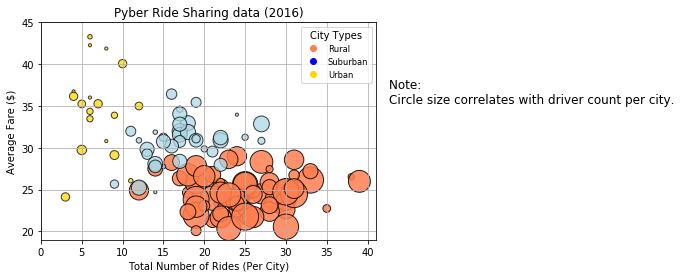

In [92]:
# set ases limits
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.title("Pyber Ride Sharing data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Incorporate a text label regarding circle size
plt.figtext(0.93, 0.60,"Note: \nCircle size correlates with driver count per city.", wrap=True,
            horizontalalignment='left', fontsize=12)

handle1 = plt.scatter(rural_number_of_rides, rural_average_fare, marker="o", facecolors="gold", edgecolors="black",
            s=rural_drivers_count, alpha=0.75, label="Rural")
handle2 = plt.scatter(urban_number_of_rides, urban_average_fare, marker="o", facecolors="coral", edgecolors="black",
            s=urban_drivers_count, alpha=0.85, label="Urban")
handle3 = plt.scatter(suburban_number_of_rides, suburban_average_fare, marker="o", facecolors="lightblue", edgecolors="black",
            s=suburban_drivers_count, alpha=0.75, label="Suburban")

# Create dummy Line2D objects for legend
h1 = Line2D([0], [0], marker='o', markersize=4, color='coral', linestyle='None', label="Rural")
h2 = Line2D([0], [0], marker='o', markersize=4, color='blue', linestyle='None', label="Suburban")
h3 = Line2D([0], [0], marker='o', markersize=4, color='gold', linestyle='None', label="Urban")

# Plot legend.
plt.legend([h1, h2], ['first', 'second'], loc="lower left", markerscale=2,
           scatterpoints=1, fontsize=10)

legend = plt.legend(handles=[h1, h2, h3], markerscale=1.5, title="City Types", loc="best", fontsize='small', fancybox=True)

In [31]:
plt.tight_layout()
plt.savefig("pyber.png")
plt.show()

<Figure size 432x288 with 0 Axes>

In [169]:
# Incorporate the other graph properties

In [ ]:
# Create a legend

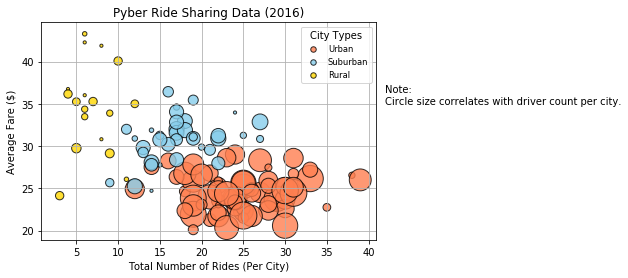

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [112]:
# rides group by type
rides_by_city_type = cities_rides_df.groupby('type')

type
Rural       0.068
Suburban    0.305
Urban       0.627
Name: fare, dtype: float64

In [113]:
# Calculate total fares by city type
total_fare = cities_rides_df['fare'].sum()
total_fare_by_city_type = rides_by_city_type['fare'].sum()
fare_percentage = round((total_fare_by_city_type / sum_fare), 3)

In [ ]:
# Build Pie Chart

In [98]:
# Show Figure
plt.show()

## Total Rides by City Type

In [116]:
# Calculate Ride Percents
total_rides = cities_rides_df['ride_id'].count()
total_rides_by_city_type = rides_by_city_type['ride_id'].count()
rides_percentage = round((total_rides_by_city_type / total_rides), 3)
rides_percentage

type
Rural       0.053
Suburban    0.263
Urban       0.684
Name: ride_id, dtype: float64

In [ ]:
# Build Pie Chart

In [ ]:
# Save Figure

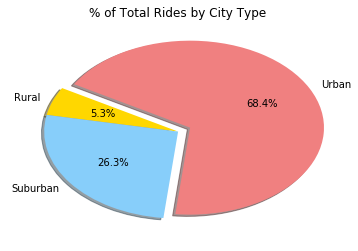

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [122]:
# Calculate Driver Percents
total_drivers = cities_df['driver_count'].sum()
drivers_by_city_type = cities_df.groupby('type')
total_drivers_by_city_type = drivers_by_city_type['driver_count'].sum()
drivers_percentage = round((total_drivers_by_city_type / total_drivers), 3)
drivers_percentage

type
Rural       0.026
Suburban    0.165
Urban       0.809
Name: driver_count, dtype: float64

In [ ]:
# Build Pie Charts

In [ ]:
# Save Figure

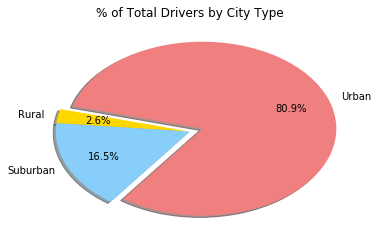

In [6]:
# Show Figure
plt.show()